# 0. Theory

Теоретический план:
- Задача регрессии;
- Линейная регрессия;
- МНК;
- Линейная регрессия градиентным спуском.

## Linear regression
* Hyphothesis function: $h_{\theta}(x)=\color{blue}{\theta_0}\cdot 1+\theta_1x_1+\ldots+\theta_nx_n$, where $\theta_0$ - is a bias term.
* Our goal is to find $\theta=(\theta_0,\theta_1,\ldots,\theta_n)^T$ such that $h_{\theta}(x)$ is close to $y$
* Loss function - quadratic loss function:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^m\left(y^{(i)}-h_{\theta}(x^{(i)})\right)^2$$
---

# 1. Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Data
## 2.1. Data Import

In [5]:
data = pd.read_csv('../data/prices.txt')

In [6]:
data.shape
data.head()

(47, 3)

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
X = data[['area', 'rooms']].values
y = data['price'].values

## 2.2. Visualisation

In [8]:
xlabel_lst = ('Area', 'Rooms')

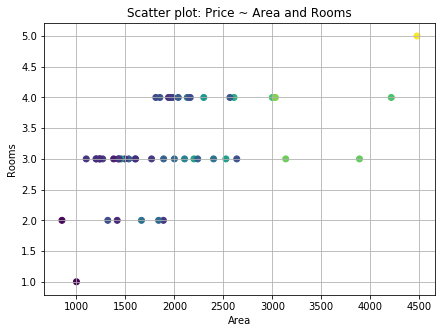

In [9]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Scatter plot: Price ~ %s and %s' % xlabel_lst)
plt.ylabel('Rooms')
plt.xlabel('Area')
plt.grid();

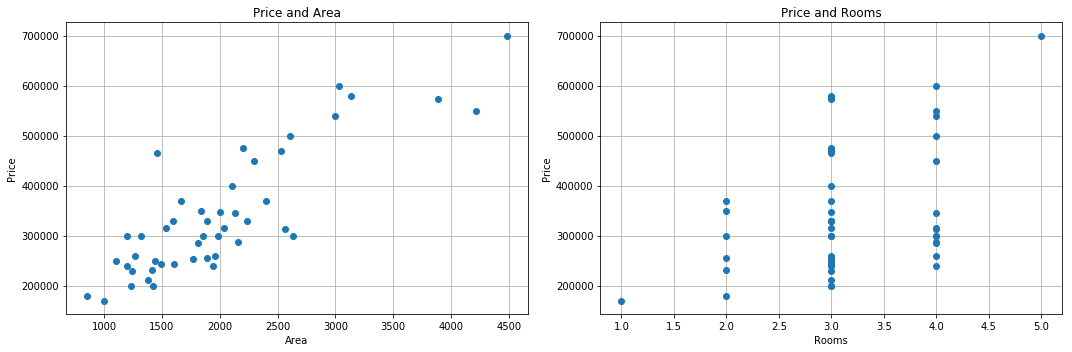

In [10]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.plot(X[:,i], y, 'o')
    plt.title('Price and %s' % xlabel_lst[i])
    plt.ylabel('Price')
    plt.xlabel(xlabel_lst[i])
    plt.grid()
    
plt.tight_layout();

# 3. Gradient Descent

In [11]:
from numpy.random import seed
from sklearn.utils import resample
from sklearn.base import BaseEstimator, RegressorMixin


# LOSS and MAE functions
def mae(y_true, y_pred):
    return np.mean(np.absolute(y_true - y_pred))


def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


class LinRegEstimator(BaseEstimator, RegressorMixin):
    '''
    Inherited methods:
    BaseEstimator - get_params, set_params
    RegressorMixin - score
    '''
    _estimator_type = 'regressor'


class LinearRegression(LinRegEstimator):
    def __init__(self, alpha=0.001, n_iter=1000, fit_intercept=True, batch_size=None, random_state=None):
        self.alpha = alpha
        self.n_iter = n_iter
        self.fit_intercept = fit_intercept
        self.batch_size = batch_size
        self.random_state = random_state
        self.w = None

    def _predict(self, X, w):
        return np.dot(X, w)
        
    def grad(self, X, y, w):
        N = len(y)
        return -(2 / N * X.T * (y - self._predict(X, w)))

    def gradient_descent(self, X, y, w, alpha=0.001, n_iter=1000,
                         batch_size=None, random_state=None):
        seed(seed=random_state)
        for _ in range(n_iter): # mini-batch (=const), stochastic (=1)
            if batch_size:
                X_batch, y_batch = resample(X, y, n_samples=batch_size, replace=False)
            else: # batch (=all)
                X_batch, y_batch = X, y
            w -= alpha * self.grad(X_batch, y_batch, w).sum(axis=1)
        return w

    def fit(self, X, y):
        # есть ли свободный член
        if self.fit_intercept:
            # добавим колонку из единиц
            X = np.c_[np.ones(len(X)), X]
        # инициализация весов линейной регрессии (нулями)
        w = np.zeros(X.shape[1])
        # градиентный спуск для подбора весов
        w = self.gradient_descent(X, y, w,
                                  alpha=self.alpha,
                                  n_iter=self.n_iter,
                                  batch_size=self.batch_size,
                                  random_state=self.random_state)
        # запись полученных весов в атрибут
        self.w = w

    def predict(self, X):
        # есть ли свободный член
        if self.fit_intercept:
            # добавим колонку из единиц
            X = np.c_[np.ones(len(X)), X]
        return self._predict(X, self.w)

In [12]:
LR = LinearRegression(alpha=0.0000001, n_iter=1000, fit_intercept=True, batch_size=10, random_state=42)

In [13]:
LR.fit(X, y)

In [14]:
y_pred = LR.predict(X)

In [15]:
mae(y, y_pred)
loss(y, y_pred)

53926.07422528884

4861617457.192424

In [16]:
# print('Number of epochs = %d' % LR.n_epoch)
print('R^2 = %.4f' % LR.score(X, y))

LR.w

R^2 = 0.6823


array([  2.03566562, 161.59635564,   3.68823436])

In [4]:
def linspace_vec(X_min_max, num=50, endpoint=True, retstep=False):
    X_linspase = [
        np.linspace(
            arr[0],
            arr[1],
            num=num,
            endpoint=endpoint,
            retstep=retstep
        )
        for arr in X_min_max
    ]
    return np.array(X_linspase)

def min_max_vec(X):
    return np.c_[X.min(axis=0), X.max(axis=0)]

In [17]:
# Точки для построения графиков
X_min_max = min_max_vec(X)
X_linspase = linspace_vec(X_min_max)

coo = np.c_[np.ones(X_linspase.shape[1]), X_linspase.T]
y_pred = np.dot(coo, LR.w)

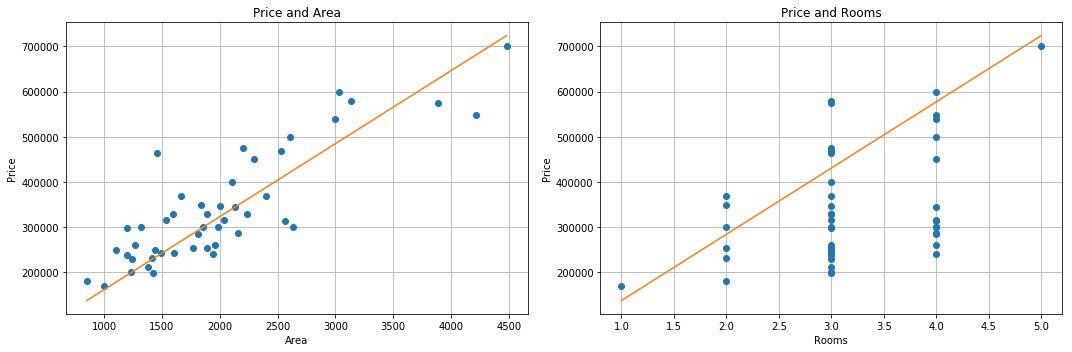

In [18]:
plt.figure(figsize=(15, 5))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.plot(X[:, i - 1], y, 'o')
    plt.plot(coo[:, i], y_pred, '-')
    plt.title('Price and %s' % xlabel_lst[i - 1])
    plt.ylabel('Price')
    plt.xlabel(xlabel_lst[i - 1])
    plt.grid()
    
plt.tight_layout();